<a href="https://colab.research.google.com/github/javmencia/COBWEBfiles/blob/main/STA410FP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proposal:
## Variational Inference for Large-Scale Bayesian Models

### Objective:
This project will explore variational inference (VI) as a scalable alternative to Markov Chain Monte Carlo (MCMC) for fitting Bayesian models. The focus will be on implementing VI for Bayesian regression and comparing its performance to traditional MCMC methods.

### Why This Project?

MCMC can be computationally expensive for high-dimensional models, making VI a valuable alternative.
VI is widely used in machine learning applications, such as deep generative models.
Offers insights into trade-offs between accuracy, speed, and interpretability in Bayesian modeling.
Methods & Implementation:

Implement Bayesian linear regression using both MCMC (e.g., Hamiltonian Monte Carlo) and VI.
Use PyMC or TensorFlow Probability for variational inference.
Compare convergence speed, model fit, and uncertainty quantification.
Extend to more complex models (e.g., Bayesian logistic regression) if time permits

In [13]:
import pymc as pm
import arviz as az
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

[1.         1.41421356 2.        ]


Output()

Output()

Output()

Output()

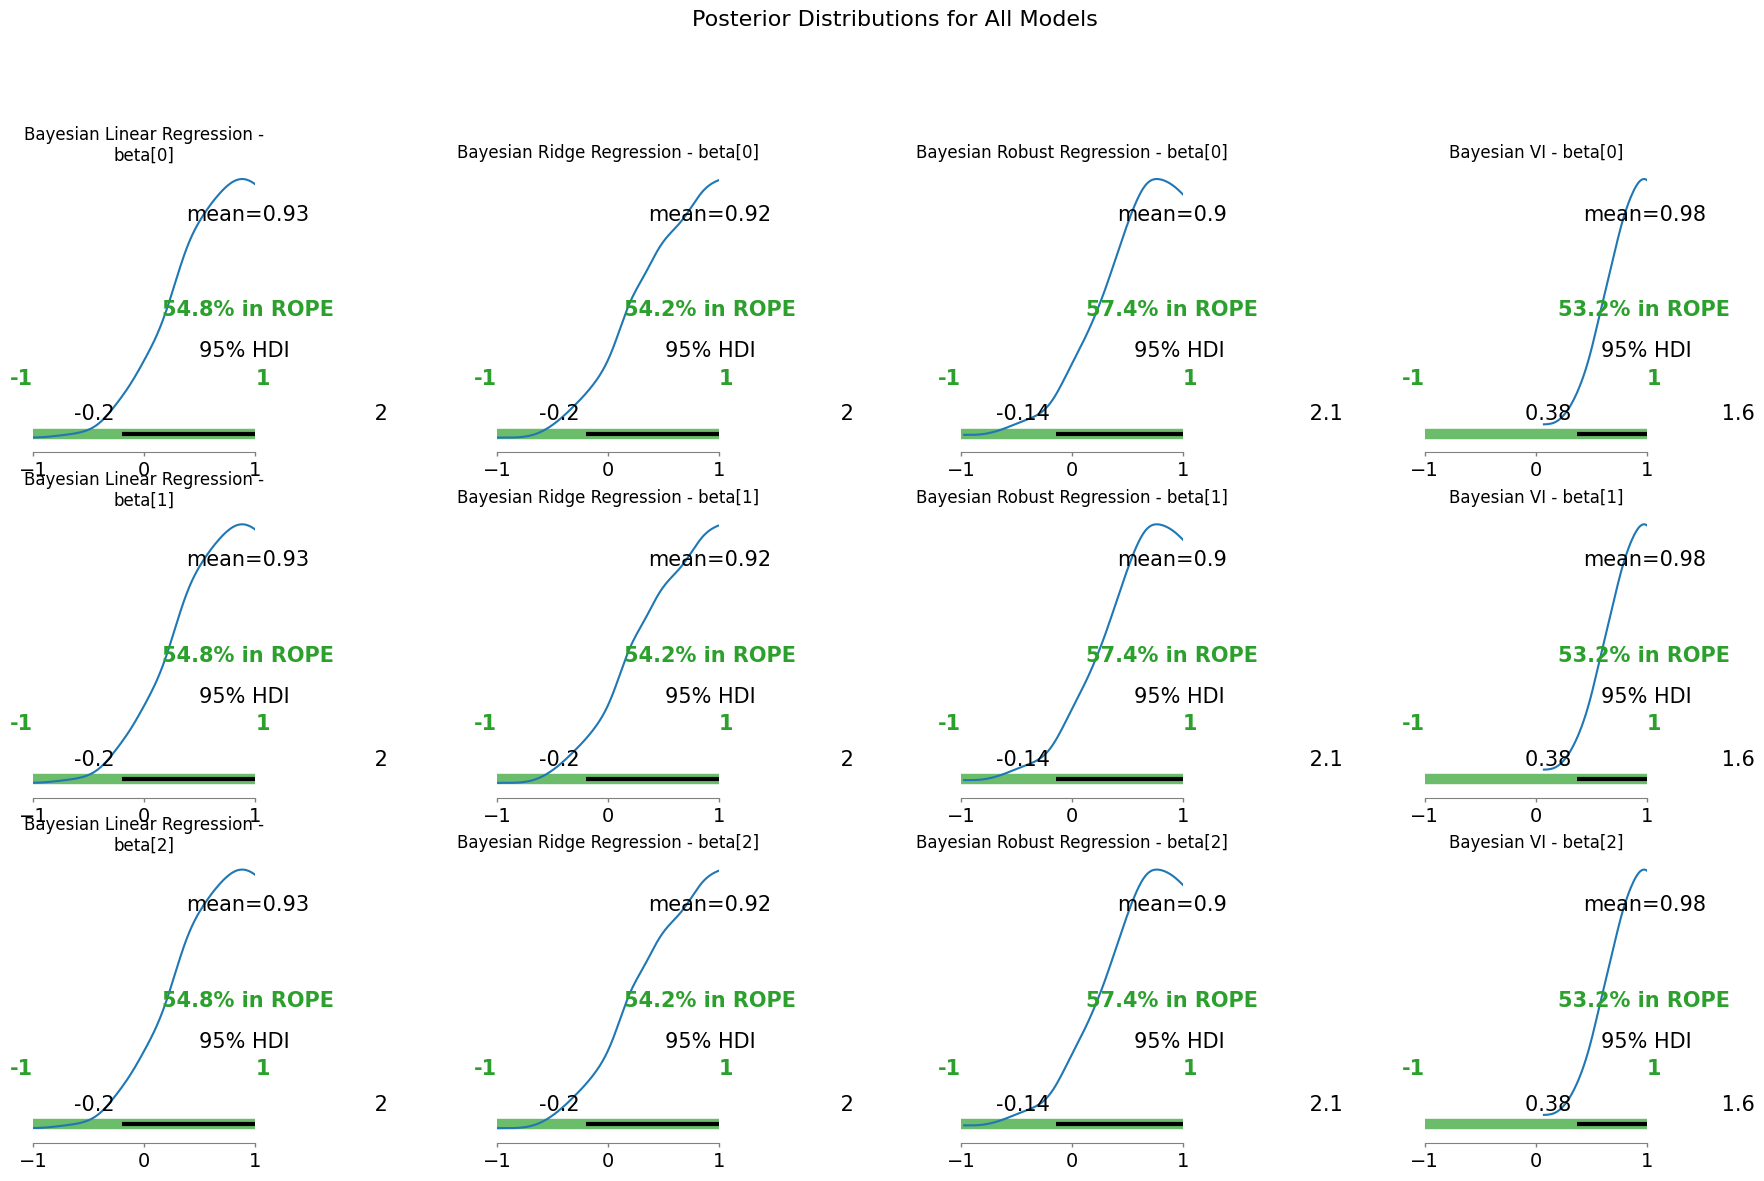

In [14]:
# Bayesian Linear Regression Model
def bayesian_regression_mcmc(X, y):
    with pm.Model() as model:
        # Priors
        beta = pm.MvNormal("beta", mu=true_beta, chol=np.eye(3), shape=3)
        sigma = pm.HalfCauchy("sigma", beta=2)  # Prior on error term

        # Likelihood
        mu = pm.math.dot(X, beta)
        y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)

        # Sample from the posterior using MCMC
        trace = pm.sample(2000, return_inferencedata=True, target_accept=0.95,
                          idata_kwargs={"log_likelihood": True})  # Ensure log likelihood is stored

    return model, trace

# Bayesian Ridge Regression Model
def bayesian_ridge_regression(X, y):
    with pm.Model() as model:
        beta = pm.MvNormal("beta", mu=true_beta, chol=np.eye(3), shape=3)
        sigma = pm.HalfCauchy("sigma", beta=2)

        mu = pm.math.dot(X, beta)
        y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)

        trace = pm.sample(2000, return_inferencedata=True, target_accept=0.95,
                          idata_kwargs={"log_likelihood": True})

    return model, trace

# Bayesian Robust Regression Model
def bayesian_robust_regression(X, y):
    with pm.Model() as model:
        beta = pm.MvNormal("beta", mu=true_beta, chol=np.eye(3), shape=3)
        sigma = pm.HalfCauchy("sigma", beta=2)
        nu = pm.Exponential("nu", 1/30)  # Degrees of freedom for the Student-T

        mu = pm.math.dot(X, beta)
        y_obs = pm.StudentT("y_obs", nu=nu, mu=mu, sigma=sigma, observed=y)

        trace = pm.sample(2000, return_inferencedata=True, target_accept=0.95,
                          idata_kwargs={"log_likelihood": True})

    return model, trace

def bayesian_regression_vi(X, y):
    with pm.Model() as model:
        beta = pm.MvNormal("beta", mu=true_beta, chol=np.eye(3), shape=3)
        sigma = pm.HalfCauchy("sigma", beta=2)
        mu = pm.math.dot(X, beta)
        y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)
        approx = pm.fit(n=10000, method="advi")  # Automatic Differentiation Variational Inference (ADVI)
    return model, approx.sample(1000)

np.random.seed(410)
n=50
# Create alternating columns of [0, 1] and [1, 0] in 3 columns
X = np.ones((n, 3))
for i in range(0, X.shape[1], 2):
    X[i::2, i] = 0
    X[i+1::2, i] = 1

# Create true_beta based on logspace
true_beta = np.logspace(0, 1, 3, base=2)
sigma_true = 1
print(true_beta)

# Generate y with added random noise
y = np.dot(X, true_beta) + stats.norm(0,sigma_true).rvs(n)


# Run all three Bayesian models
model_mcmc, trace_mcmc = bayesian_regression_mcmc(X, y)
model_ridge, trace_ridge = bayesian_ridge_regression(X, y)
model_robust, trace_robust = bayesian_robust_regression(X, y)
model_vi, trace_vi = bayesian_regression_vi(X, y)

# Create the plot
fig, axes = plt.subplots(3, 4, figsize=(18, 12))

# Plot for Bayesian Linear Regression
for i in range(3):  # Loop over the three betas
    az.plot_posterior(trace_mcmc, var_names=["beta"], hdi_prob=0.95, ax=axes[i, 0], rope=(-1, 1))
    axes[i, 0].set_title(f"Bayesian Linear Regression - beta[{i}]")
    axes[i, 0].set_xlim(-1, 1)

# Plot for Bayesian Ridge Regression
for i in range(3):  # Loop over the three betas
    az.plot_posterior(trace_ridge, var_names=["beta"], hdi_prob=0.95, ax=axes[i, 1], rope=(-1, 1))
    axes[i, 1].set_title(f"Bayesian Ridge Regression - beta[{i}]")
    axes[i, 1].set_xlim(-1, 1)

# Plot for Bayesian Robust Regression
for i in range(3):  # Loop over the three betas
    az.plot_posterior(trace_robust, var_names=["beta"], hdi_prob=0.95, ax=axes[i, 2], rope=(-1, 1))
    axes[i, 2].set_title(f"Bayesian Robust Regression - beta[{i}]")
    axes[i, 2].set_xlim(-1, 1)

# Plot for Bayesian VI
for i in range(3):  # Loop over the three betas
    az.plot_posterior(trace_vi, var_names=["beta"], hdi_prob=0.95, ax=axes[i, 3], rope=(-1, 1))
    axes[i, 3].set_title(f"Bayesian VI - beta[{i}]")
    axes[i, 3].set_xlim(-1, 1)

plt.suptitle("Posterior Distributions for All Models", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()


Output()

Output()

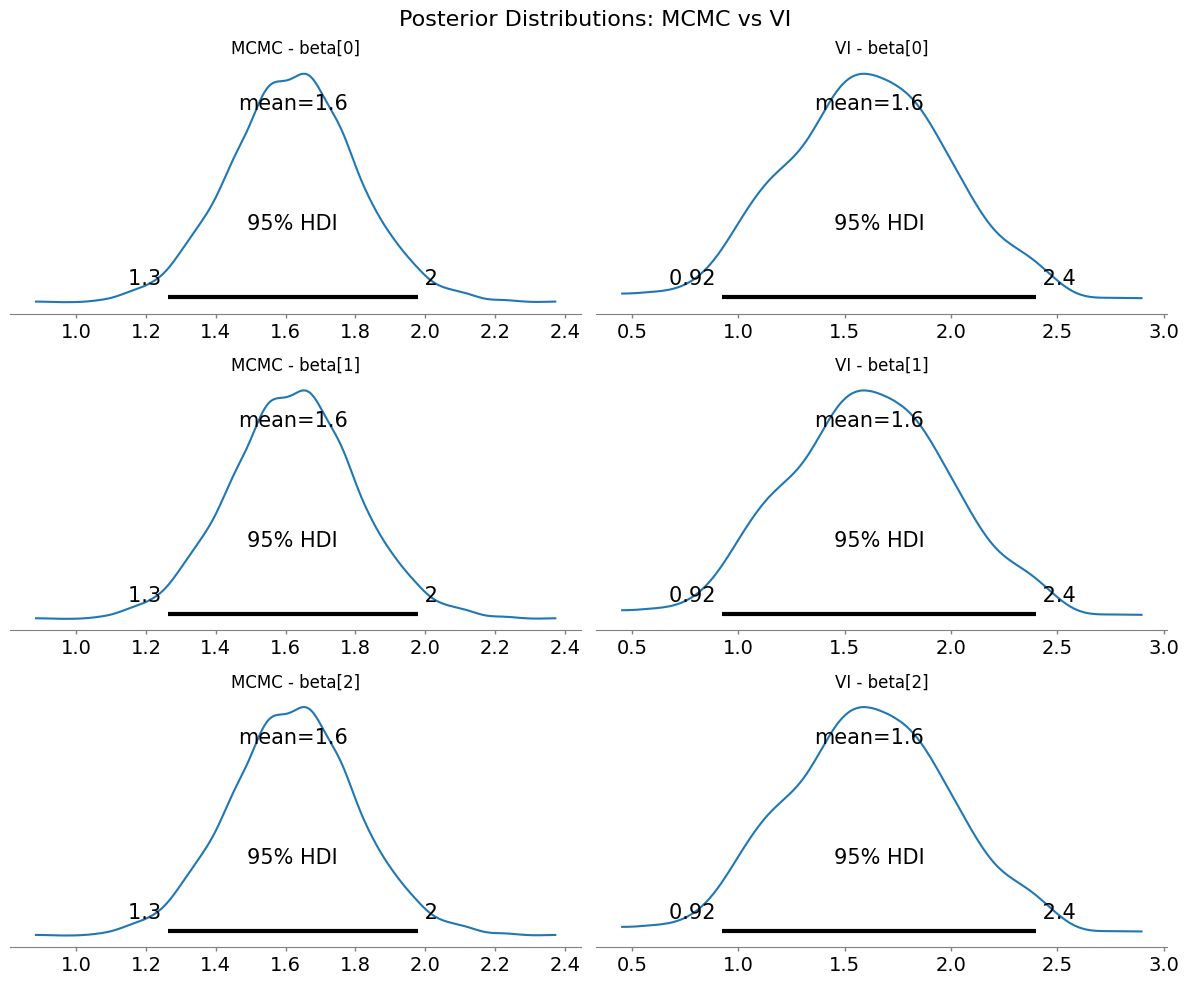

In [8]:
def bayesian_regression_mcmc(X, y):
    with pm.Model() as model:
        beta = pm.Normal("beta", mu=0, sigma=10, shape=X.shape[1])
        sigma = pm.HalfCauchy("sigma", beta=2)
        mu = pm.math.dot(X, beta)
        y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)
        trace = pm.sample(2000, return_inferencedata=True, target_accept=0.95, idata_kwargs={"log_likelihood": True})
    return model, trace

def bayesian_regression_vi(X, y):
    with pm.Model() as model:
        beta = pm.Normal("beta", mu=0, sigma=10, shape=X.shape[1])
        sigma = pm.HalfCauchy("sigma", beta=2)
        mu = pm.math.dot(X, beta)
        y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)
        approx = pm.fit(n=10000, method="advi")  # Automatic Differentiation Variational Inference (ADVI)
    return model, approx.sample(1000)

# Generate synthetic data
np.random.seed(42)
X = np.random.randn(50, 3)
true_beta = np.array([1.5, -2.0, 0.5])
y = np.dot(X, true_beta) + np.random.randn(50)

# Run both inference methods
model_mcmc, trace_mcmc = bayesian_regression_mcmc(X, y)
model_vi, trace_vi = bayesian_regression_vi(X, y)

# Plot MCMC posterior distributions
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
for i in range(3):
    az.plot_posterior(trace_mcmc, var_names=["beta"], hdi_prob=0.95, ax=axes[i, 0])
    axes[i, 0].set_title(f"MCMC - beta[{i}]")

# Plot VI posterior distributions
for i in range(3):
    az.plot_posterior(trace_vi, var_names=["beta"], hdi_prob=0.95, ax=axes[i, 1])
    axes[i, 1].set_title(f"VI - beta[{i}]")

plt.suptitle("Posterior Distributions: MCMC vs VI", fontsize=16)
plt.tight_layout()
plt.show()